In [1]:
import sys
sys.path.append("../") 
from infer_veritas import  *
from truthfinder import *

In [4]:
with gzip.open('../veritas_models/veritas_001.pkl.gz', 'rb') as file:
    vmodel = pickle.load(file)


In [6]:
vmodel

{'version': '0.0.1',
 'model': qnet.Qnet,
 'model_neg': qnet.Qnet,
 'problem': '',
 'dist_lower': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9d0ae40790>,
 'LOWER_THRESHOLD': 0.9154097135778224,
 'dist_veritas': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f9d0ae410f0>,
 'VERITAS_THRESHOLD': 0.7766973222129768,
 'upper_scoretoprobability': <bound method processRoc.scoretoprobability of <zedstat.zedstat.processRoc object at 0x7f9d0ae42020>>,
 'UPPER_THRESHOLD': 1.297963929289763,
 'AUC': (0.8575819672131147, 0.8657822325456725, 0.849381701880557)}

In [10]:
OUTDIR='../veritas_models/ptsdtrees/'
model=vmodel['model']
model.viz_trees(tree_path=OUTDIR,big_enough_threshold=1,format='png', remove_dotfile=False)

In [19]:
from quasinet.utils import remove_newline_in_dotfile, analyze_dot_file
import glob
D={}
for dotfile in glob.glob(OUTDIR+'/*dot'):
    tgt=dotfile.split('/')[-1].replace('.dot','')
    src= np.array(analyze_dot_file(dotfile,fracThreshold=0.0)[1])
    D[tgt]=src

In [20]:
D

{'ptsd1': array(['ptsd105', 'ptsd202', 'ptsd95', 'ptsd20', 'ptsd123', 'ptsd63',
        'ptsd209'], dtype='<U7'),
 'ptsd2': array(['ptsd63', 'ptsd152', 'ptsd129', 'ptsd160', 'ptsd160', 'ptsd68'],
       dtype='<U7'),
 'ptsd3': array([], dtype=float64),
 'ptsd4': array(['ptsd91', 'ptsd2', 'ptsd23', 'ptsd170', 'ptsd186', 'ptsd69'],
       dtype='<U7'),
 'ptsd5': array(['ptsd92', 'ptsd31', 'ptsd119', 'ptsd23', 'ptsd199', 'ptsd138',
        'ptsd138', 'ptsd146', 'ptsd38'], dtype='<U7'),
 'ptsd6': array(['ptsd8', 'ptsd90', 'ptsd204', 'ptsd13', 'ptsd174'], dtype='<U7'),
 'ptsd7': array(['ptsd42', 'ptsd24', 'ptsd65', 'ptsd92', 'ptsd42', 'ptsd197'],
       dtype='<U7'),
 'ptsd8': array(['ptsd7', 'ptsd155', 'ptsd89', 'ptsd27', 'ptsd16'], dtype='<U7'),
 'ptsd9': array(['ptsd35', 'ptsd28', 'ptsd38', 'ptsd46', 'ptsd125', 'ptsd46'],
       dtype='<U7'),
 'ptsd10': array(['ptsd9', 'ptsd179', 'ptsd108', 'ptsd140', 'ptsd140', 'ptsd113',
        'ptsd161'], dtype='<U7'),
 'ptsd11': array(['ptsd144', 'p

In [ ]:
def initialize_visit_stack(graph):
    # Initialize all nodes in the graph as keys in the visited and stack dictionaries.
    all_nodes = set(graph.keys()) | {node for neighbors in graph.values() for node in neighbors}
    visited = {node: False for node in all_nodes}
    stack = {node: False for node in all_nodes}
    return visited, stack

def find_cycles(graph):
    def dfs(node, visited, stack):
        if stack[node]:
            return [[node]]
        if visited[node]:
            return []

        visited[node] = True
        stack[node] = True

        cycles = []
        for neighbor in graph.get(node, []):
            for cycle in dfs(neighbor, visited, stack):
                cycle.append(node)
                if cycle[0] == node:
                    cycles.append(cycle)
                else:
                    cycles.append(cycle)

        stack[node] = False
        return cycles

    visited, stack = initialize_visit_stack(graph)
    all_cycles = []
    for node in graph:
        if not visited[node]:
            cycles = dfs(node, visited, stack)
            all_cycles.extend(cycles)
|
    unique_cycles = set(tuple(sorted(cycle)) for cycle in all_cycles)
    return [list(cycle) for cycle in unique_cycles]

In [66]:
import networkx as nx

# Your original graph as a dictionary
graph = D
# Create a directed graph object using NetworkX
G = nx.DiGraph()

# Add nodes and edges to the graph from the dictionary
for node, neighbors in graph.items():
    if len(neighbors) > 0:
        G.add_node(node)
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

# Define the path and filename for your .dot file
dotfile_path = "depgraph.dot"

# Write the graph to a .dot file
nx.nx_pydot.write_dot(G, dotfile_path)

print(f"Graph has been saved as {dotfile_path}")

Graph has been saved as depgraph.dot


In [22]:
# Define your graph structure here.
graph = D

cycles = find_cycles(graph)
print(cycles)

[['ptsd1', 'ptsd10', 'ptsd100', 'ptsd101', 'ptsd102', 'ptsd103', 'ptsd104', 'ptsd105', 'ptsd106', 'ptsd107', 'ptsd108', 'ptsd109', 'ptsd11', 'ptsd110', 'ptsd111', 'ptsd113', 'ptsd114', 'ptsd117', 'ptsd119', 'ptsd12', 'ptsd120', 'ptsd121', 'ptsd123', 'ptsd124', 'ptsd125', 'ptsd126', 'ptsd127', 'ptsd128', 'ptsd129', 'ptsd131', 'ptsd132', 'ptsd133', 'ptsd134', 'ptsd135', 'ptsd136', 'ptsd137', 'ptsd138', 'ptsd139', 'ptsd140', 'ptsd142', 'ptsd144', 'ptsd145', 'ptsd146', 'ptsd147', 'ptsd148', 'ptsd149', 'ptsd150', 'ptsd153', 'ptsd154', 'ptsd155', 'ptsd157', 'ptsd158', 'ptsd159', 'ptsd16', 'ptsd161', 'ptsd162', 'ptsd163', 'ptsd164', 'ptsd165', 'ptsd167', 'ptsd168', 'ptsd169', 'ptsd170', 'ptsd172', 'ptsd174', 'ptsd175', 'ptsd176', 'ptsd178', 'ptsd179', 'ptsd18', 'ptsd180', 'ptsd182', 'ptsd184', 'ptsd186', 'ptsd189', 'ptsd190', 'ptsd192', 'ptsd193', 'ptsd194', 'ptsd195', 'ptsd198', 'ptsd199', 'ptsd2', 'ptsd20', 'ptsd200', 'ptsd204', 'ptsd205', 'ptsd207', 'ptsd208', 'ptsd209', 'ptsd21', 'ptsd210

In [23]:
len(cycles)

554

(array([ 15.,  19.,  25.,  37.,  40.,  41.,  65.,  48., 118., 146.]),
 array([  7. ,  22.3,  37.6,  52.9,  68.2,  83.5,  98.8, 114.1, 129.4,
        144.7, 160. ]),
 <BarContainer object of 10 artists>)

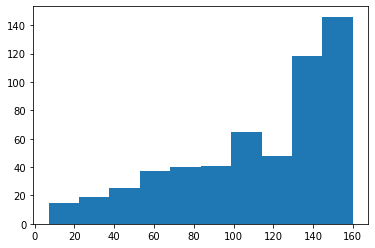

In [27]:
import pylab as plt
plt.hist([len(x) for x in cycles])

In [34]:
CF=pd.DataFrame(pd.Series([len(x) for x in cycles]),columns=['clen'])
CF[CF.clen<10]

,clen
200,9
328,7


In [35]:
cycles[328]

['ptsd1', 'ptsd105', 'ptsd124', 'ptsd124', 'ptsd127', 'ptsd186', 'ptsd51']

In [71]:
import pandas as pd
import graph_tool.all as gt
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from tqdm import tqdm


class Network(object):
    
    def __init__(self,
                 input_dotfile,
                 cmap=cm.Spectral_r,
                 edgecolmap=None,
                 preflen=8,
                 alpha=.7,
                 minsize=5,
                 edgealpha=.2,
                 exponent=1,
                 edgecollim=2,
                 nodesep=10,
                 strongcomponent=True,
                 removeselfloops=True,
                 exponentialscaling=True,
                 outfile=None):
        """Process hypothesis generated dotfile for network visualization

        Args:
          input_dotfile (str): dotfile generated from hypothesis module
          cmap (matplotlib colormap):  color map for nodes (Default value = cm.Spectral_r)
          edgecolmap (matplotlib colormap):  edge color map (Default value = None)
          preflen (int):  max length of node names (Default value = None)
          alpha (float):  alpha for nodes (Default value = .7)
          minsize (int):  minimum soze of nodes (Default value = 5)
          nodesep (int):  node separation in position calculation (Default value = 10)
          edgealpha (float):  edge alpha (Default value = .2)
          exponent (int):  exponent in exponential scaling (Default value = 1)
          edgecollim (int):  range for colomap on edges (Default value = 2)
          strongcomponent (bool):  if True only show strong component (Default value = True)
          removeselfloops (bool):  if True remove self loops (Default value = True)
          exponentialscaling (bool):  if True use exponential scaling (Default value = True)
          outfile (str):  output filename (Default value = None)

        Returns:

        """
        if edgecolmap is None:
            self.edgecolmap=LinearSegmentedColormap.from_list(
                'edgecolmap',
                ['#0000ff', 
                 '#888888',
                 '#ff0000'])
        else:
            self.edgecolmap=edgecolmap
        self.minsize=minsize
        self.cmap=cmap
        self.network=None
        self.dotfile=input_dotfile
        self.preflen=preflen
        self.edgealpha=edgealpha
        self.exponent=exponent
        self.edgecollim=edgecollim
        self.strongcomponent=strongcomponent
        self.removeselfloops=removeselfloops
        self.exponentialscaling=exponentialscaling
        self.alpha=alpha
        self.nodesep=nodesep
        self.nm=None
        self.od=None
        self.pos=None
        self.hl=None
        self.ew_pen=None
        self.e_marker=None
        self.deg=None
        self.control=None
        self.ods=None
        self.varclass=None
        self.ecol=None
        self.outfile=outfile
        
    def short_name(self,s,LEN):
        """

        Args:
          s (str): string
          LEN (nt): length of short name

        Returns:
          str: short name

        """
        num=len(s.split('_'))
        if num>1:
            LEN=int(LEN//num) + 1
            
        return '_'.join([x[:LEN] for x in s.split('_')])
        
        
    def f(self,x,A=0,E=True,exponent=2.0):
        """adjust node sizes

        Args:
          x: 
          A:  (Default value = 0)
          E:  (Default value = True)
          exponent:  (Default value = 2.0)

        Returns:
          float
        """
        if E:
            return exponent**x + A
        return x+A

    def sfunc(self,val,SIGN=False):
        """

        Args:
          val: 
          SIGN:  (Default value = False)

        Returns:
          float
        """
        if SIGN:
            return np.sign(val)
        return val

 
    def get(self):
        """Set graph-tool network for drawing"""
        self.network = gt.load_graph(self.dotfile)

        if self.strongcomponent:
            self.network=gt.extract_largest_component(
                self.network, directed=True, prune=True)

        if self.removeselfloops:
            gt.remove_self_loops(self.network)

        self.nm = self.network.new_vertex_property("string")
        nm2 = self.network.new_vertex_property("string")
        self.hl = self.network.new_vertex_property("bool")
        self.network.vertex_properties["text"] = self.nm
        self.network.vertex_properties["text"] = nm2
        names=[]
        for v in self.network.vertices():
            if v.out_degree() > -1:
                self.nm[v]=self.short_name(
                    self.network.vp.vertex_name[v],self.preflen)
                nm2[v]=self.short_name(
                    self.network.vp.vertex_name[v],self.preflen)
                self.hl[v]=False
            else:
                nm2[v]=self.short_name(
                    self.network.vp.vertex_name[v],self.preflen)
                self.nm[v]=''
                self.hl[v]=False
            names=names+[nm2[v]]

        NAMES=pd.Series(list(set(names)),
                        name='varclass').reset_index().set_index('varclass')
        self.varclass = self.network.new_vertex_property("float")
        self.network.vertex_properties["varclass"] = self.varclass
        for v in self.network.vertices():
            self.varclass[v]=NAMES.loc[nm2[v]].values[0]

        self.od = self.network.new_vertex_property("float")
        self.network.vertex_properties["size"] = self.od
        for v in self.network.vertices():
            self.od[v]=self.f(v.out_degree(),
                              A=self.minsize,
                              E=self.exponentialscaling,
                              exponent=self.exponent)+5
        self.ods = self.network.new_vertex_property("float")
        self.network.vertex_properties["size"] = self.ods
        for v in self.network.vertices():
            self.ods[v]=1*self.f(v.out_degree(),
                                 A=self.minsize,
                                 E=self.exponentialscaling,
                                 exponent=1)+2

        self.ew = self.network.new_edge_property("float")
        self.network.edge_properties["eweight"] = 1
        for e in self.network.edges():
            self.ew[e]=float(self.network.ep.weight[e])**1

        self.ew_pen = self.network.new_edge_property("float")
        self.network.edge_properties["eweight_pen"] = self.ew_pen
        for e in self.network.edges():
            self.ew_pen[e]=4/(1 + np.exp(-.05-np.fabs(float(self.network.ep.weight[e]))))

        self.e_marker = self.network.new_edge_property("string")
        self.network.edge_properties["e_marker"] = self.e_marker
        for e in self.network.edges():
            if float(self.network.ep.weight[e]) < 0:
                self.e_marker[e]='bar'
            else:
                self.e_marker[e]='arrow'

        self.deg = self.network.degree_property_map("out")

        self.ecol = self.network.new_edge_property("vector<double>")
        self.network.edge_properties["ecol"] = self.ecol
        for e in self.network.edges():
            col=cm.ScalarMappable(mpl.colors.Normalize(vmin=-self.edgecollim,
                                                       vmax=self.edgecollim),
                                  cmap=self.edgecolmap).to_rgba(float(self.ew[e]))
            col=list(col)
            col[3]=self.edgealpha
            self.ecol[e]=tuple(col)

        self.pos = gt.graphviz_draw(self.network,
                                    overlap=False,
                                    vsize=20,
                                    sep=self.nodesep,
                                    output=None)

        self.control = self.network.new_edge_property("vector<double>")
        for e in self.network.edges():
            d = np.sqrt(np.sum((self.pos[e.source()].a
                                - self.pos[e.target()].a) ** 2))
            d=d/2
            self.control[e] = [0.0,0.0,0, .2*d, 0.5, d,1,0]

        if self.outfile is not None:
            gt.graph_draw(self.network,nodesfirst=False,
                          pos=self.pos,
                          vertex_halo=self.hl,
                          vertex_halo_color=[.2,.2,.2,.1],
                          edge_pen_width=self.ew_pen,
                          edge_end_marker=self.e_marker,
                          vorder=self.deg,
                          edge_marker_size=10,
                          vertex_color=self.varclass,#[.5,.5,.5,.3],
                          edge_color=self.ecol,#[.5,.5,.5,.5],
                          vertex_pen_width=1.5,
                          vertex_size=self.od,
                          vertex_text=self.nm,
                          vcmap=(self.cmap,self.alpha),
                          edge_control_points=self.control,
                          vertex_fill_color=self.varclass,#deg,
                          vertex_font_size=self.ods,
                          vertex_text_color=[.1,.1,.1,.8],
                          #vertex_text_position=0,
                          output=self.outfile)

    def draw(self,
             pen_width=None,
             cmap=None,
             alpha=None,
             text_pos=None):
        """Draw  network

        Args:
          pen_width (float):  (Default value = None)
          cmap (matplotlib colormap):  (Default value = None)
          alpha (float):  (Default value = None)
          text_pos (float): if not None, puts node text below node (Default value = None)

        Returns:

        """

        if pen_width is None:
            edge_pen_width=self.ew_pen
        else:
            edge_pen_width=pen_width
            
        if cmap is None:
            cmap=self.cmap
            
        if alpha is None:
            alpha=self.alpha

        if text_pos is None:
            gt.graph_draw(self.network,nodesfirst=False,
                          pos=self.pos,
                          vertex_halo=self.hl,
                          vertex_halo_color=[.2,.2,.2,.1],
                          edge_pen_width=pen_width,
                          edge_end_marker=self.e_marker,
                          vorder=self.deg,
                          edge_marker_size=10,
                          vertex_color=self.varclass,#[.5,.5,.5,.3],
                          edge_color=self.ecol,#[.5,.5,.5,.5],
                          vertex_pen_width=1.5,
                          vertex_size=self.od,
                          vertex_text=self.nm,
                          vcmap=(cmap,alpha),
                          edge_control_points=self.control,
                          vertex_fill_color=self.varclass,#deg,
                          vertex_font_size=self.ods,
                          vertex_text_color=[.1,.1,.1,.8],
                          output=self.outfile)
        else:
            gt.graph_draw(self.network,nodesfirst=False,
                          pos=self.pos,
                          vertex_halo=self.hl,
                          vertex_halo_color=[.2,.2,.2,.1],
                          edge_pen_width=pen_width,
                          edge_end_marker=self.e_marker,
                          vorder=self.deg,
                          edge_marker_size=10,
                          vertex_color=self.varclass,#[.5,.5,.5,.3],
                          edge_color=self.ecol,#[.5,.5,.5,.5],
                          vertex_pen_width=1.5,
                          vertex_size=self.od,
                          vertex_text=self.nm,
                          vcmap=(cmap,alpha),
                          edge_control_points=self.control,
                          vertex_fill_color=self.varclass,#deg,
                          vertex_font_size=self.ods,
                          vertex_text_color=[.1,.1,.1,.8],
                          vertex_text_position=text_pos,
                          output=self.outfile)
             


In [72]:
! cat depgraph.dot

strict digraph  {
ptsd1;
ptsd105;
ptsd202;
ptsd95;
ptsd20;
ptsd123;
ptsd63;
ptsd209;
ptsd2;
ptsd152;
ptsd129;
ptsd160;
ptsd68;
ptsd4;
ptsd91;
ptsd23;
ptsd170;
ptsd186;
ptsd69;
ptsd5;
ptsd92;
ptsd31;
ptsd119;
ptsd199;
ptsd138;
ptsd146;
ptsd38;
ptsd6;
ptsd8;
ptsd90;
ptsd204;
ptsd13;
ptsd174;
ptsd7;
ptsd42;
ptsd24;
ptsd65;
ptsd197;
ptsd155;
ptsd89;
ptsd27;
ptsd16;
ptsd9;
ptsd35;
ptsd28;
ptsd46;
ptsd125;
ptsd10;
ptsd179;
ptsd108;
ptsd140;
ptsd113;
ptsd161;
ptsd11;
ptsd144;
ptsd22;
ptsd120;
ptsd154;
ptsd183;
ptsd57;
ptsd12;
ptsd48;
ptsd84;
ptsd41;
ptsd102;
ptsd192;
ptsd94;
ptsd181;
ptsd86;
ptsd40;
ptsd14;
ptsd139;
ptsd133;
ptsd195;
ptsd15;
ptsd167;
ptsd211;
ptsd18;
ptsd188;
ptsd36;
ptsd198;
ptsd17;
ptsd49;
ptsd210;
ptsd157;
ptsd61;
ptsd99;
ptsd19;
ptsd116;
ptsd32;
ptsd43;
ptsd158;
ptsd131;
ptsd59;
ptsd88;
ptsd201;
ptsd29;
ptsd21;
ptsd100;
ptsd33;
ptsd83;
ptsd173;
ptsd44;
ptsd47;
ptsd156;
ptsd111;
ptsd34;
ptsd56;
ptsd66;
ptsd141;
ptsd134;
ptsd25;
ptsd37;
ptsd26;
ptsd87;
ptsd193;
ptsd85;
ptsd

In [73]:
a=Network('depgraph.dot',strongcomponent=False, removeselfloops=False,outfile='dep.png')

In [74]:
a.get()

ValueError: value must be of type PropertyMap, not <class 'int'>

In [69]:
a.draw()

AttributeError: 'NoneType' object has no attribute 'num_vertices'